In [3]:
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import numpy as np

In [4]:
dir = "./output"

In [5]:
results = pd.read_csv(dir + "/grid_search.csv")
results

,1 Month Anomaly (%) Rainfall,3 Months Anomaly (%) Rainfall,Cereals and tubers,Exchange rate (USD/LCU),FCS,Fatality,Lat,Lon,NDVI Anomaly,Population,...,max_depth,min_child_weight,n_estimators,rCSI,subsample,h,r2_train,r2_val,val_loss,train_loss
0,NaN,NaN,6,1,1,1,NaN,0,6,0,...,20,7.0,70,1,0.54,1,0.986380,0.973770,2.539235,1.598737
1,NaN,NaN,6,1,1,1,NaN,0,6,0,...,20,7.0,70,1,0.54,2,0.984058,0.962403,3.639582,1.873742
2,NaN,NaN,6,1,1,1,NaN,0,6,0,...,20,7.0,70,1,0.54,3,0.981872,0.951913,4.655149,2.133501
3,NaN,NaN,6,1,1,1,NaN,0,6,0,...,20,7.0,70,1,0.54,4,0.979848,0.924827,7.277231,2.375197
4,NaN,NaN,6,1,1,1,NaN,0,6,0,...,20,7.0,70,1,0.54,5,0.978739,0.916317,8.100994,2.509973
5,NaN,NaN,6,1,1,1,NaN,0,6,0,...,20,7.0,70,1,0.54,6,0.977874,0.879150,11.699041,2.616582
6,NaN,NaN,6,1,1,1,NaN,0,6,0,...,20,7.0,70,1,0.54,7,0.977761,0.856794,13.863240,2.634702
7,NaN,NaN,6,1,1,1,NaN,0,6,0,...,20,7.0,70,1,0.54,8,0.976823,0.866297,12.943303,2.750913
8,NaN,NaN,6,1,1,1,NaN,0,6,0,...,20,7.0,70,1,0.54,9,0.976986,0.844525,15.050956,2.736862
9,NaN,NaN,6,1,1,1,NaN,0,6,0,...,20,7.0,70,1,0.54,10,0.976771,0.836950,15.784279,2.767819


In [4]:
best_loss = list()

def loss(group):
    best_loss.append(group.val_loss.min())

results.groupby("h").apply(loss);

In [5]:
np.mean(best_loss)

16.044733510666664

In [4]:
trials = pickle.load(open(dir + "/hyp_trials.p", "rb"))

In [5]:
trials

In [8]:
# Results of various trials hyperopt optimization.
loss_history = [t["result"]["loss"] for t in trials.trials]
fatality_history = [t["misc"]["vals"]["Fatality"][0] for t in trials.trials]
#batch_size_history = [t["misc"]["vals"]["batch_size"][0] for t in trials.trials]

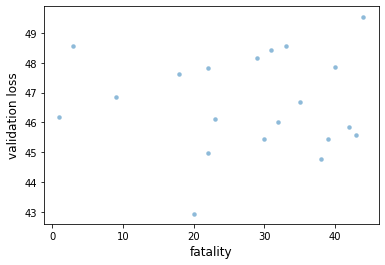

In [9]:
fig, ax = plt.subplots()
ax.scatter(fatality_history, loss_history, s = 20, linewidth = 0.01, alpha = 0.5)
ax.set_xlabel("fatality", fontsize = 12)
ax.set_ylabel("validation loss", fontsize = 12);

Text(0, 0.5, 'validation loss')

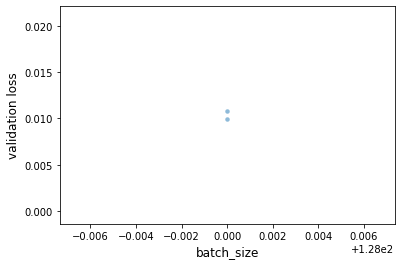

In [10]:
fig, ax = plt.subplots()
ax.scatter(batch_size_history, loss_history, s = 20, linewidth = 0.01, alpha = 0.5)
ax.set_xlabel("batch_size", fontsize = 12)
ax.set_ylabel("validation loss", fontsize = 12)